<a href="https://colab.research.google.com/github/neliudochka/WeightsHeights/blob/main/1lab_LiniearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML lab 1  
# Linear regression  
  
## Preparatory stage:
**1. Select a dataset and analyze it.**  
I chose [Heights and Weights Dataset](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset/data).  
It contains two columns: height and weight. So the model should be able to predict the height from the given weight.  



In [ ]:
#import module for data analysis
import pandas as pd
url = 'https://raw.githubusercontent.com/neliudochka/WeightsHeights/main/WeightHeight.csv'
data = pd.read_csv(url)
data.head(2)




,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873


**2. Determine input and output:**  
Input: weight  
Output: height  

**3.  Visualize the dependencies between inputs and outputs**


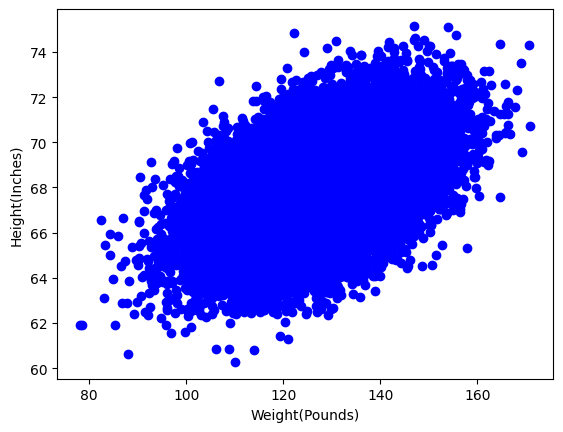

In [ ]:
#module for visualization

import matplotlib.pyplot as plt

w = 'Weight(Pounds)'
h = 'Height(Inches)'

plt.plot(data[w], data[h], 'bo')
plt.xlabel(w)
plt.ylabel(h)
plt.show()


**4. Detect anomalies, incomplete samples in the data, etc**  
My dataset is clean, so no actions here


**5. To conduct correlational input of analyzes and outputs of the data set, to identify interdependent factors.**


In [ ]:
import numpy as np

r = np.corrcoef(data[w], data[h])

print(f"correlation: {r[0][1]}")

correlation: 0.502858520602844



**6. Prepare data for further use.**



In [ ]:
dataW = np.array(data[w]).reshape((-1, 1))



**7. Divide the selected and filtered data set into training and test data sets part (70% for training, 30% for the test).**

In [ ]:
from sklearn.model_selection import train_test_split

wTrain, wTest, hTrain, hTest = train_test_split(dataW, data[h], test_size=0.3, random_state=1)

# Implementation of the model  

Write code in Python / R, which is implemented using three approaches to choose from:  
**1.SciKit learn**  

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(wTrain, hTrain)
h_model1 = model1.predict(wTest)

Visualization


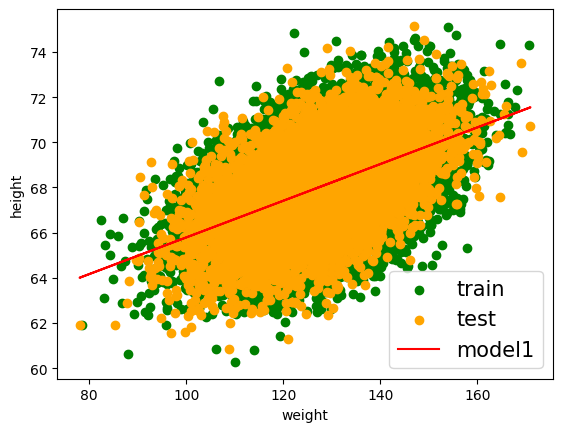

In [ ]:
plt.scatter(wTrain, hTrain, color = 'green')
plt.scatter(wTest, hTest, color = 'orange')
plt.plot(wTest, h_model1, color = 'red');

plt.legend(('train', 'test', 'model1'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=15)
plt.ylabel('height')
plt.xlabel('weight')
plt.show()

Evaluation of Linear Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse1 = mean_squared_error(hTest, h_model1)
r_sq1 = r2_score(hTest, h_model1)
print(f"coefficient of determination: {r_sq1}")
print(f"mse: {mse1}")


coefficient of determination: 0.26629637216003565
mse: 2.678948790188849


Model y = b0 + b1*x coefficients:

In [ ]:
print(f"intercept (b0): {model1.intercept_}")
print(f"slope (b1): {model1.coef_}")

print(f"Our model is y = {model1.intercept_} + {model1.coef_}*x")

intercept (b0): 57.66878905963925
slope (b1): [0.08121487]
Our model is y = 57.66878905963925 + [0.08121487]*x


Compare predicted responses by model and linear function with given coef

In [ ]:
y_pred = model1.predict(wTest[:3])
print(f"Model: predicted response:\n{y_pred}\n")

y_pred = model1.intercept_ + model1.coef_ * wTest[:3]
print(f"Linear Function with coef: predicted response:\n{y_pred}")

Model: predicted response:
[67.94972259 68.93459907 67.74028568]

Linear Function with coef: predicted response:
[[67.94972259]
 [68.93459907]
 [67.74028568]]


**2.XGBoost**  


In [ ]:
from xgboost import XGBRegressor

model2 = XGBRegressor(booster='gblinear')

model2.fit(wTrain, hTrain)

h_model2 = model2.predict(wTest)

Visualization


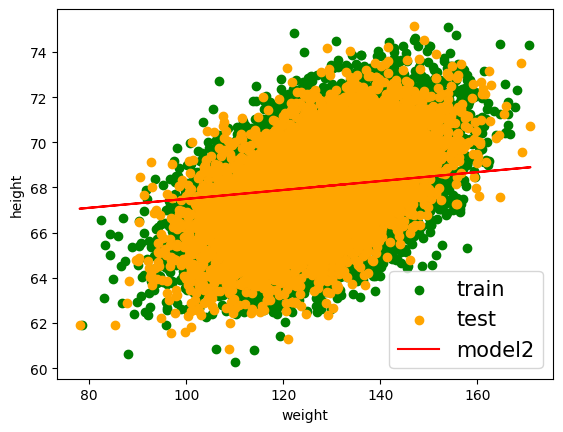

In [ ]:
plt.scatter(wTrain, hTrain, color = 'green')
plt.scatter(wTest, hTest, color = 'orange')
plt.plot(wTest, h_model2, color = 'red');

plt.legend(('train', 'test', 'model2'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=15)
plt.ylabel('height')
plt.xlabel('weight')
plt.show()

Evaluation of Linear Regression Model

In [ ]:
mse2 = mean_squared_error(hTest, h_model2)
r_sq2 = r2_score(hTest, h_model2)

print(f"coefficient of determination: {r_sq2}")
print(f"mse: {mse2}")


coefficient of determination: 0.11069945542665371
mse: 3.24707487819414


**3.Vanilla Python (Numpy/Pandas)**  


In [ ]:
# need to find w and b in y= wx + b
def gradient_descent(L, ep, X, Y):
  # w and b must be random, but to have same results I made them const
  w = 0
  b = 50
  #w = np.random.randn()
  #b = np.random.randn()


  # m - amount of input pairs
  m = float(len(X))

  for i in range(ep):
      #derivatives
    dw = 0
    db = 0

    for i in range(int(m)):
      x = X[i]
      y = Y[i]

      # J = 1/m Sum(y_pred-y)^2

      dw += 2 * ((w*x + b)-y) * x
      db += 2 * ((w*x + b)-y)

    dw = dw/m
    db = db/m

    w = w - (dw)*L
    b = b - (db)*L

  return w, b

L = 0.00001
ep = 200

w, b = gradient_descent(L, ep, np.array(wTrain), np.array(hTrain))
print(w, b)

h_model3 = w*wTest + b
h_model3

[0.14106787] [50.00135529]


array([[67.85903863],
       [69.56974051],
       [67.49525279],
       ...,
       [68.8734577 ],
       [66.71788417],
       [68.72427843]])

Visualization

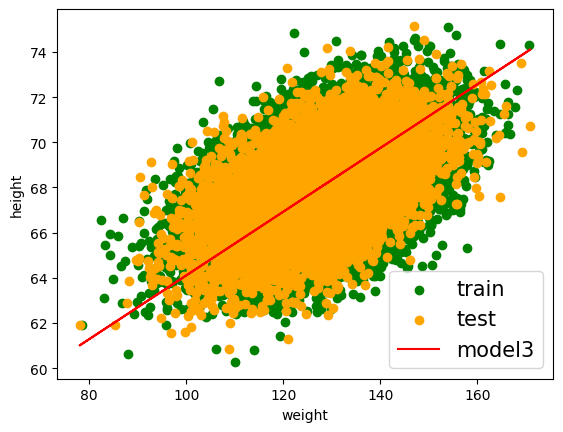

In [ ]:
plt.scatter(wTrain, hTrain, color = 'green')
plt.scatter(wTest, hTest, color = 'orange')
plt.plot(wTest, h_model3, color = 'red');

plt.legend(('train', 'test', 'model3'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=15)
plt.ylabel('height')
plt.xlabel('weight')
plt.show()

Evaluation of Linear Regression Model

In [ ]:
mse3 = mean_squared_error(hTest, h_model3)
r_sq3 = r2_score(hTest, h_model3)
print(f"coefficient of determination: {r_sq3}")
print(f"mse: {mse3}")


coefficient of determination: 0.14079410824966532
mse: 3.1371912266593736


# Analysis of results  

|    |  model1 | model2  |     model3     |
|----|---------|---------|----------------|
|with| SciKit  | XGBoost | Vanilla Python |
|R^2 | 0.27    |   0.11  |     0.14       |
|mse | 2.68    |   3.25  |     3.14       |

model1 > model3 > model2  

With different approaches, I got different results. The best model, judging by R^2 and mse, for the task, is model1. In the second place is model3. And on the last one - model2. Such results could be obtained because of the different factors.  
First, model2, which uses XGBoost may have such a bad result, because I used the default parameters. In the future, I'll try to use parameters to get better models.  
Second, model3, which was implemented by me, is, well, interesting. It hugely depends on the input values (w, b, L). With some of the inputs, the resulting model had no sense or coefficient of determination was negative. I tried to understand whether such behaviour was my fault but didn't really understand where the mistake could be (if it was there). So I chose the default values of w and b by the eye and got okay results.
Third, the dataset is not the best. The correlation between the values exists (and is equal to 0.5), but the differences between the Ys, which have the same X are quite big. It can be seen by the graphical representation of the data.  


So, while doing this lab I learned how to implement Linear Regression with different approaches. In my next work, I want to work with data preparation and to try and use different parameters to train my models in order to get a better behaivior.